# $l_1$ and $l_\infty$ Regression
Some code is given below to generate a synthetic dataset. Using CVX, solve two linear programs for computing the regression line for $l_1$ and $l_\infty$ regression. Plot the lines over the data to evaluate the fit.


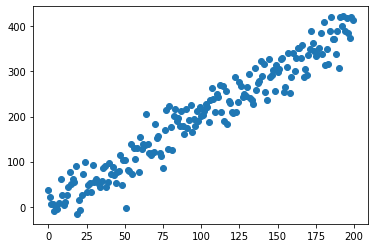

In [135]:
# l_1 and l_infinity regression using cvxpy
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt

# generate a synthetic dataset

# actual parameter values
theta1_act = 2
theta2_act = 5

# Number of points in dataset
N = 200

# Noise magnitude
mag = 30

# datapoints
x = np.arange(0, N)
y = theta1_act*x + theta2_act*np.ones([1, N]) + np.random.normal(0, mag, N)

plt.figure()
# Scatter plot of data
plt.scatter(x, y)
plt.show()

In [136]:
data = np.concatenate([x, np.ones(N)]).reshape(2, N).T  # add bias column
targets = y.flatten()

In [137]:
theta = cvx.Variable(2)
slack_l1 = cvx.Variable(N)

obj_l1 = cvx.Minimize(cvx.sum(slack_l1))
constr_l1 = [
    data @ theta - targets <= slack_l1,
    data @ theta - targets >= -1 * slack_l1
]

prob_l1 = cvx.Problem(obj_l1, constr_l1)
prob_l1.solve()

print("The minimized l1-loss is", prob_l1.value)
print("Coefficients of linear regression are", theta.value)

The minimized l1-loss is 4698.643126906095
Coefficients of linear regression are [2.00971549 0.49438446]


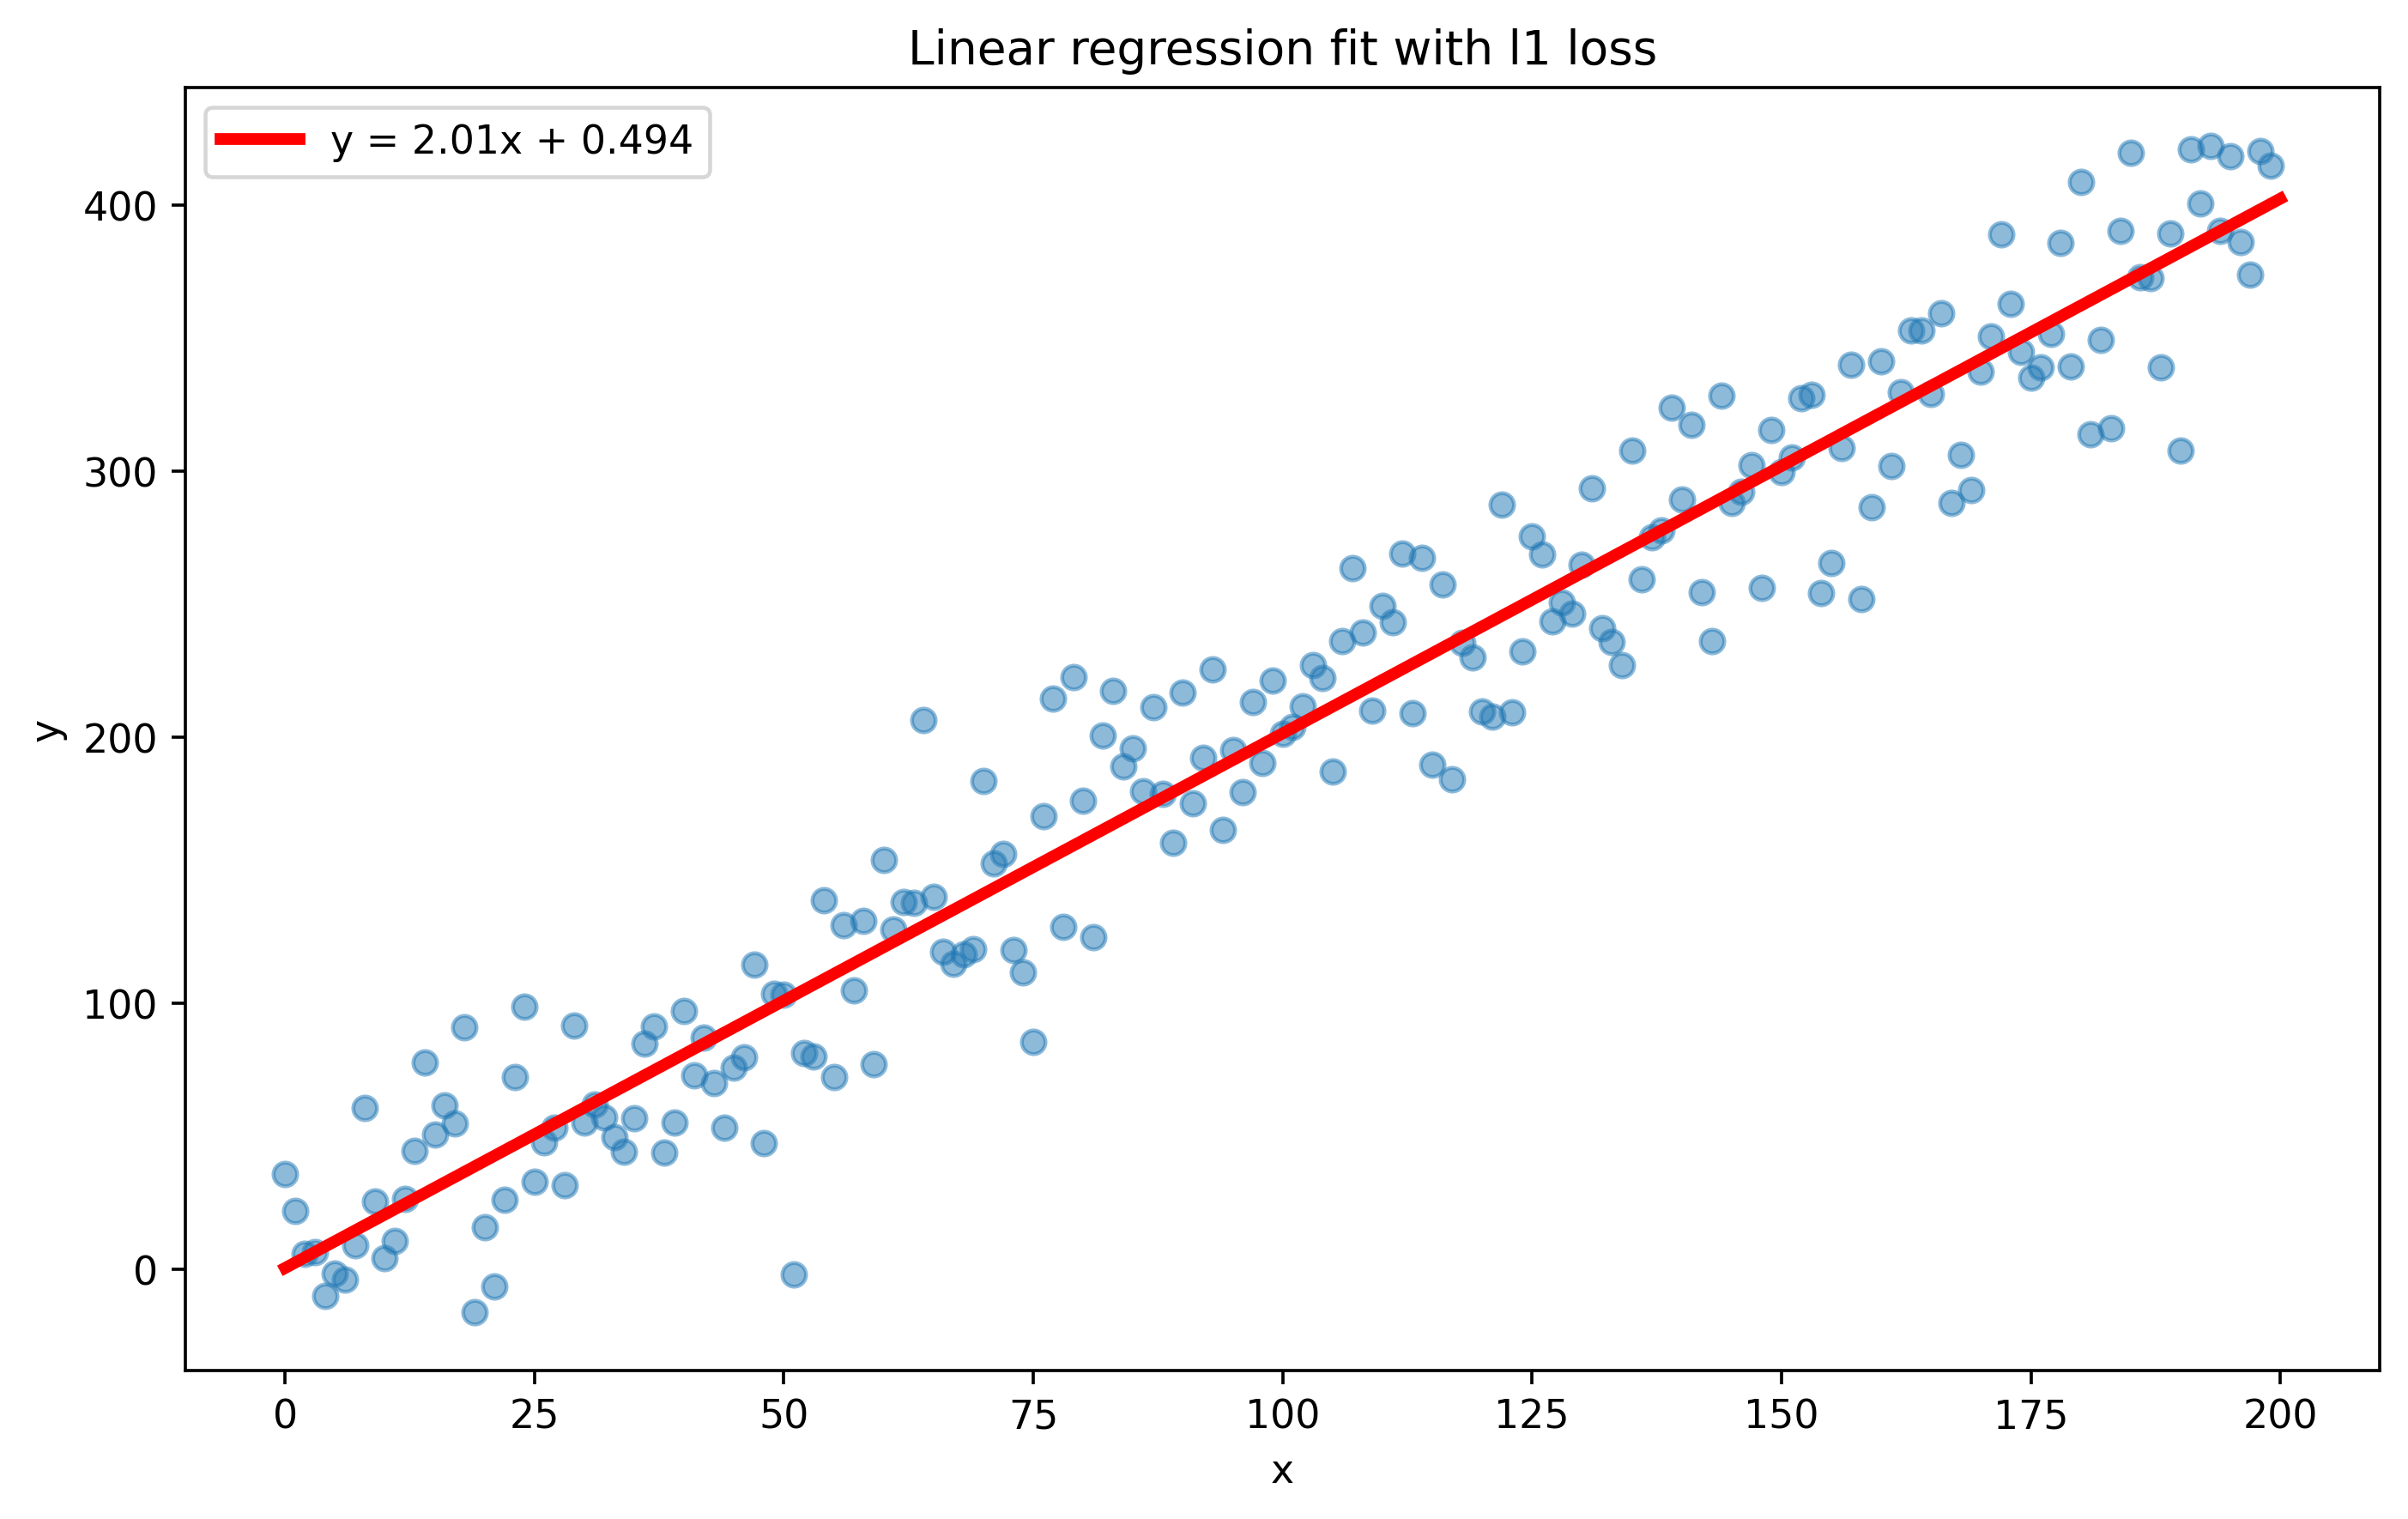

In [138]:
theta_l1 = theta.value
x_pt = np.linspace(0, 200, 2)
y_pt = theta_l1[0]*x_pt + theta_l1[1]

plt.figure(figsize=(10, 6), dpi=330)
plt.scatter(data[:, 0], targets, alpha=0.5)
plt.plot(x_pt, y_pt, '-r', linewidth=3, label=f"y = {round(theta_l1[0], 3)}x + {round(theta_l1[1], 3)}")

plt.title("Linear regression fit with l1 loss")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [158]:
theta = cvx.Variable(2)
slack_linf = cvx.Variable()

obj_linf = cvx.Minimize(slack_linf)
constr_linf = [
    data @ theta - targets <= slack_linf,
    data @ theta - targets >= -1 * slack_linf
]

prob_linf = cvx.Problem(obj_linf, constr_linf)
prob_linf.solve()

print("The minimized l1-loss is", prob_linf.value)
print("Coefficients of linear regression are", theta.value)

The minimized l1-loss is 89.71302344996039
Coefficients of linear regression are [  2.2259671  -25.57365852]


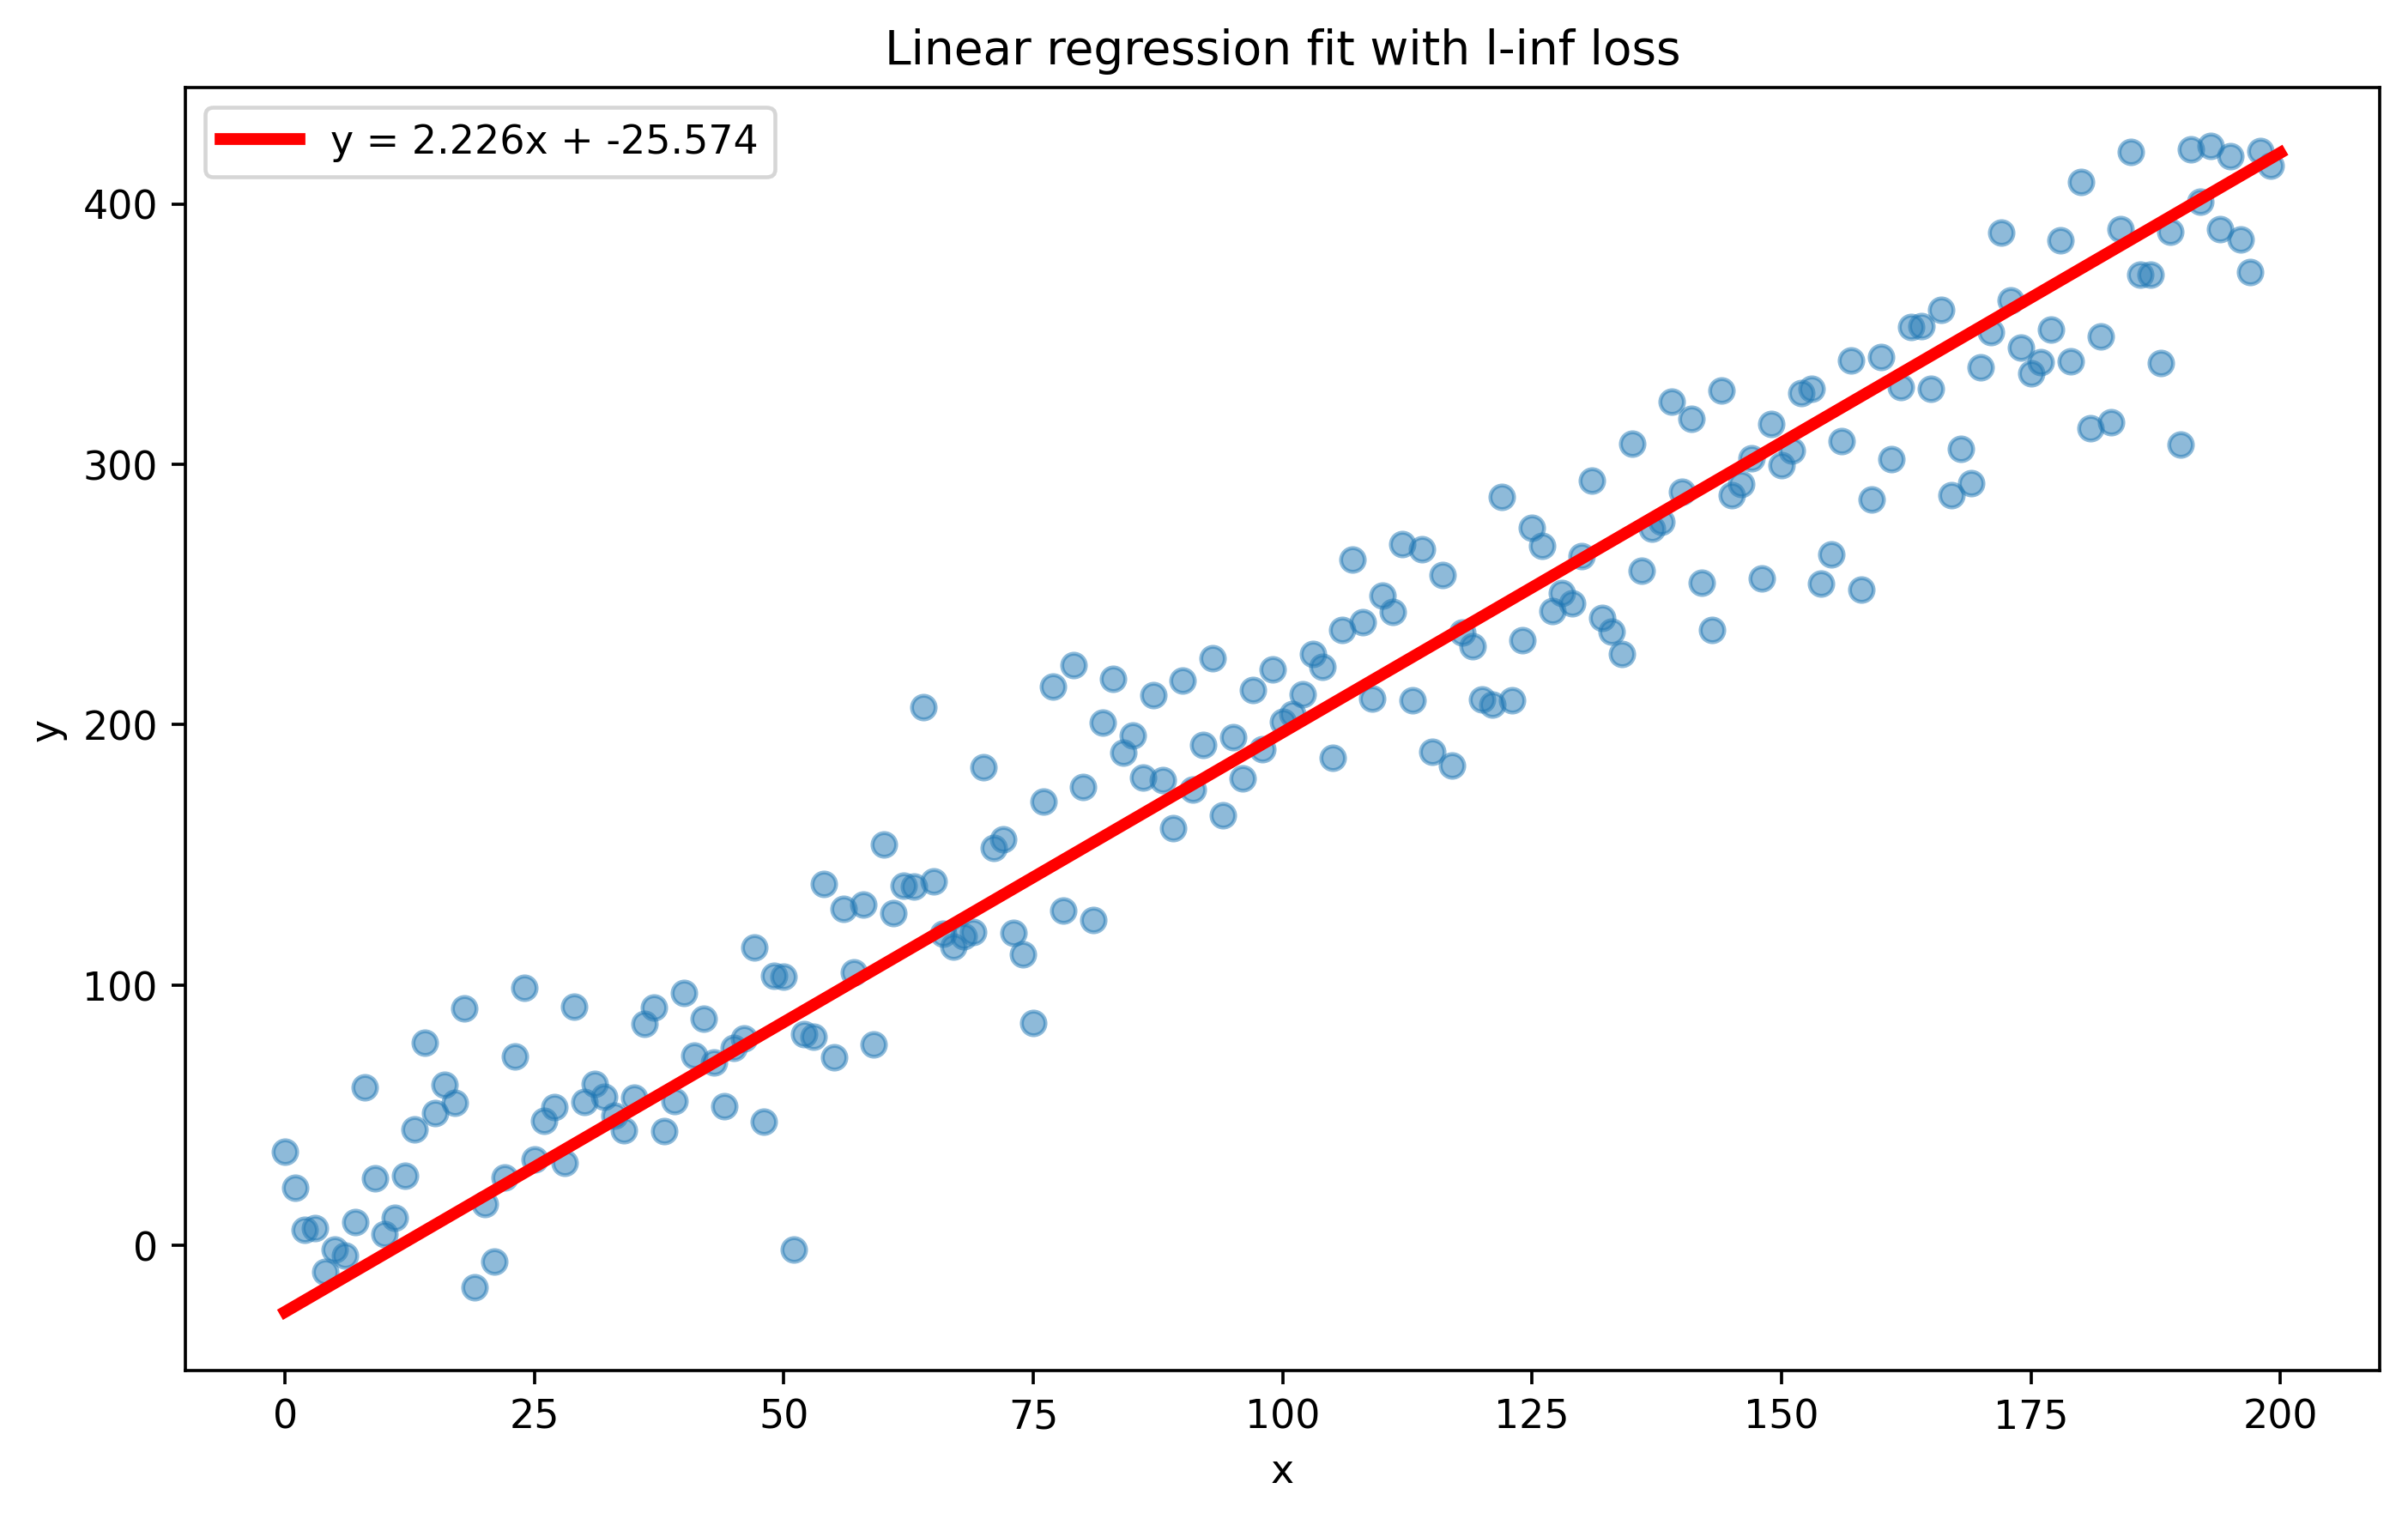

In [159]:
theta_linf = theta.value
x_pt = np.linspace(0, 200, 2)
y_pt = theta_linf[0]*x_pt + theta_linf[1]

plt.figure(figsize=(10, 6), dpi=330)
plt.scatter(data[:, 0], targets, alpha=0.5)
plt.plot(x_pt, y_pt, '-r', linewidth=3, label=f"y = {round(theta_linf[0], 3)}x + {round(theta_linf[1], 3)}")

plt.title("Linear regression fit with l-inf loss")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Combined plot

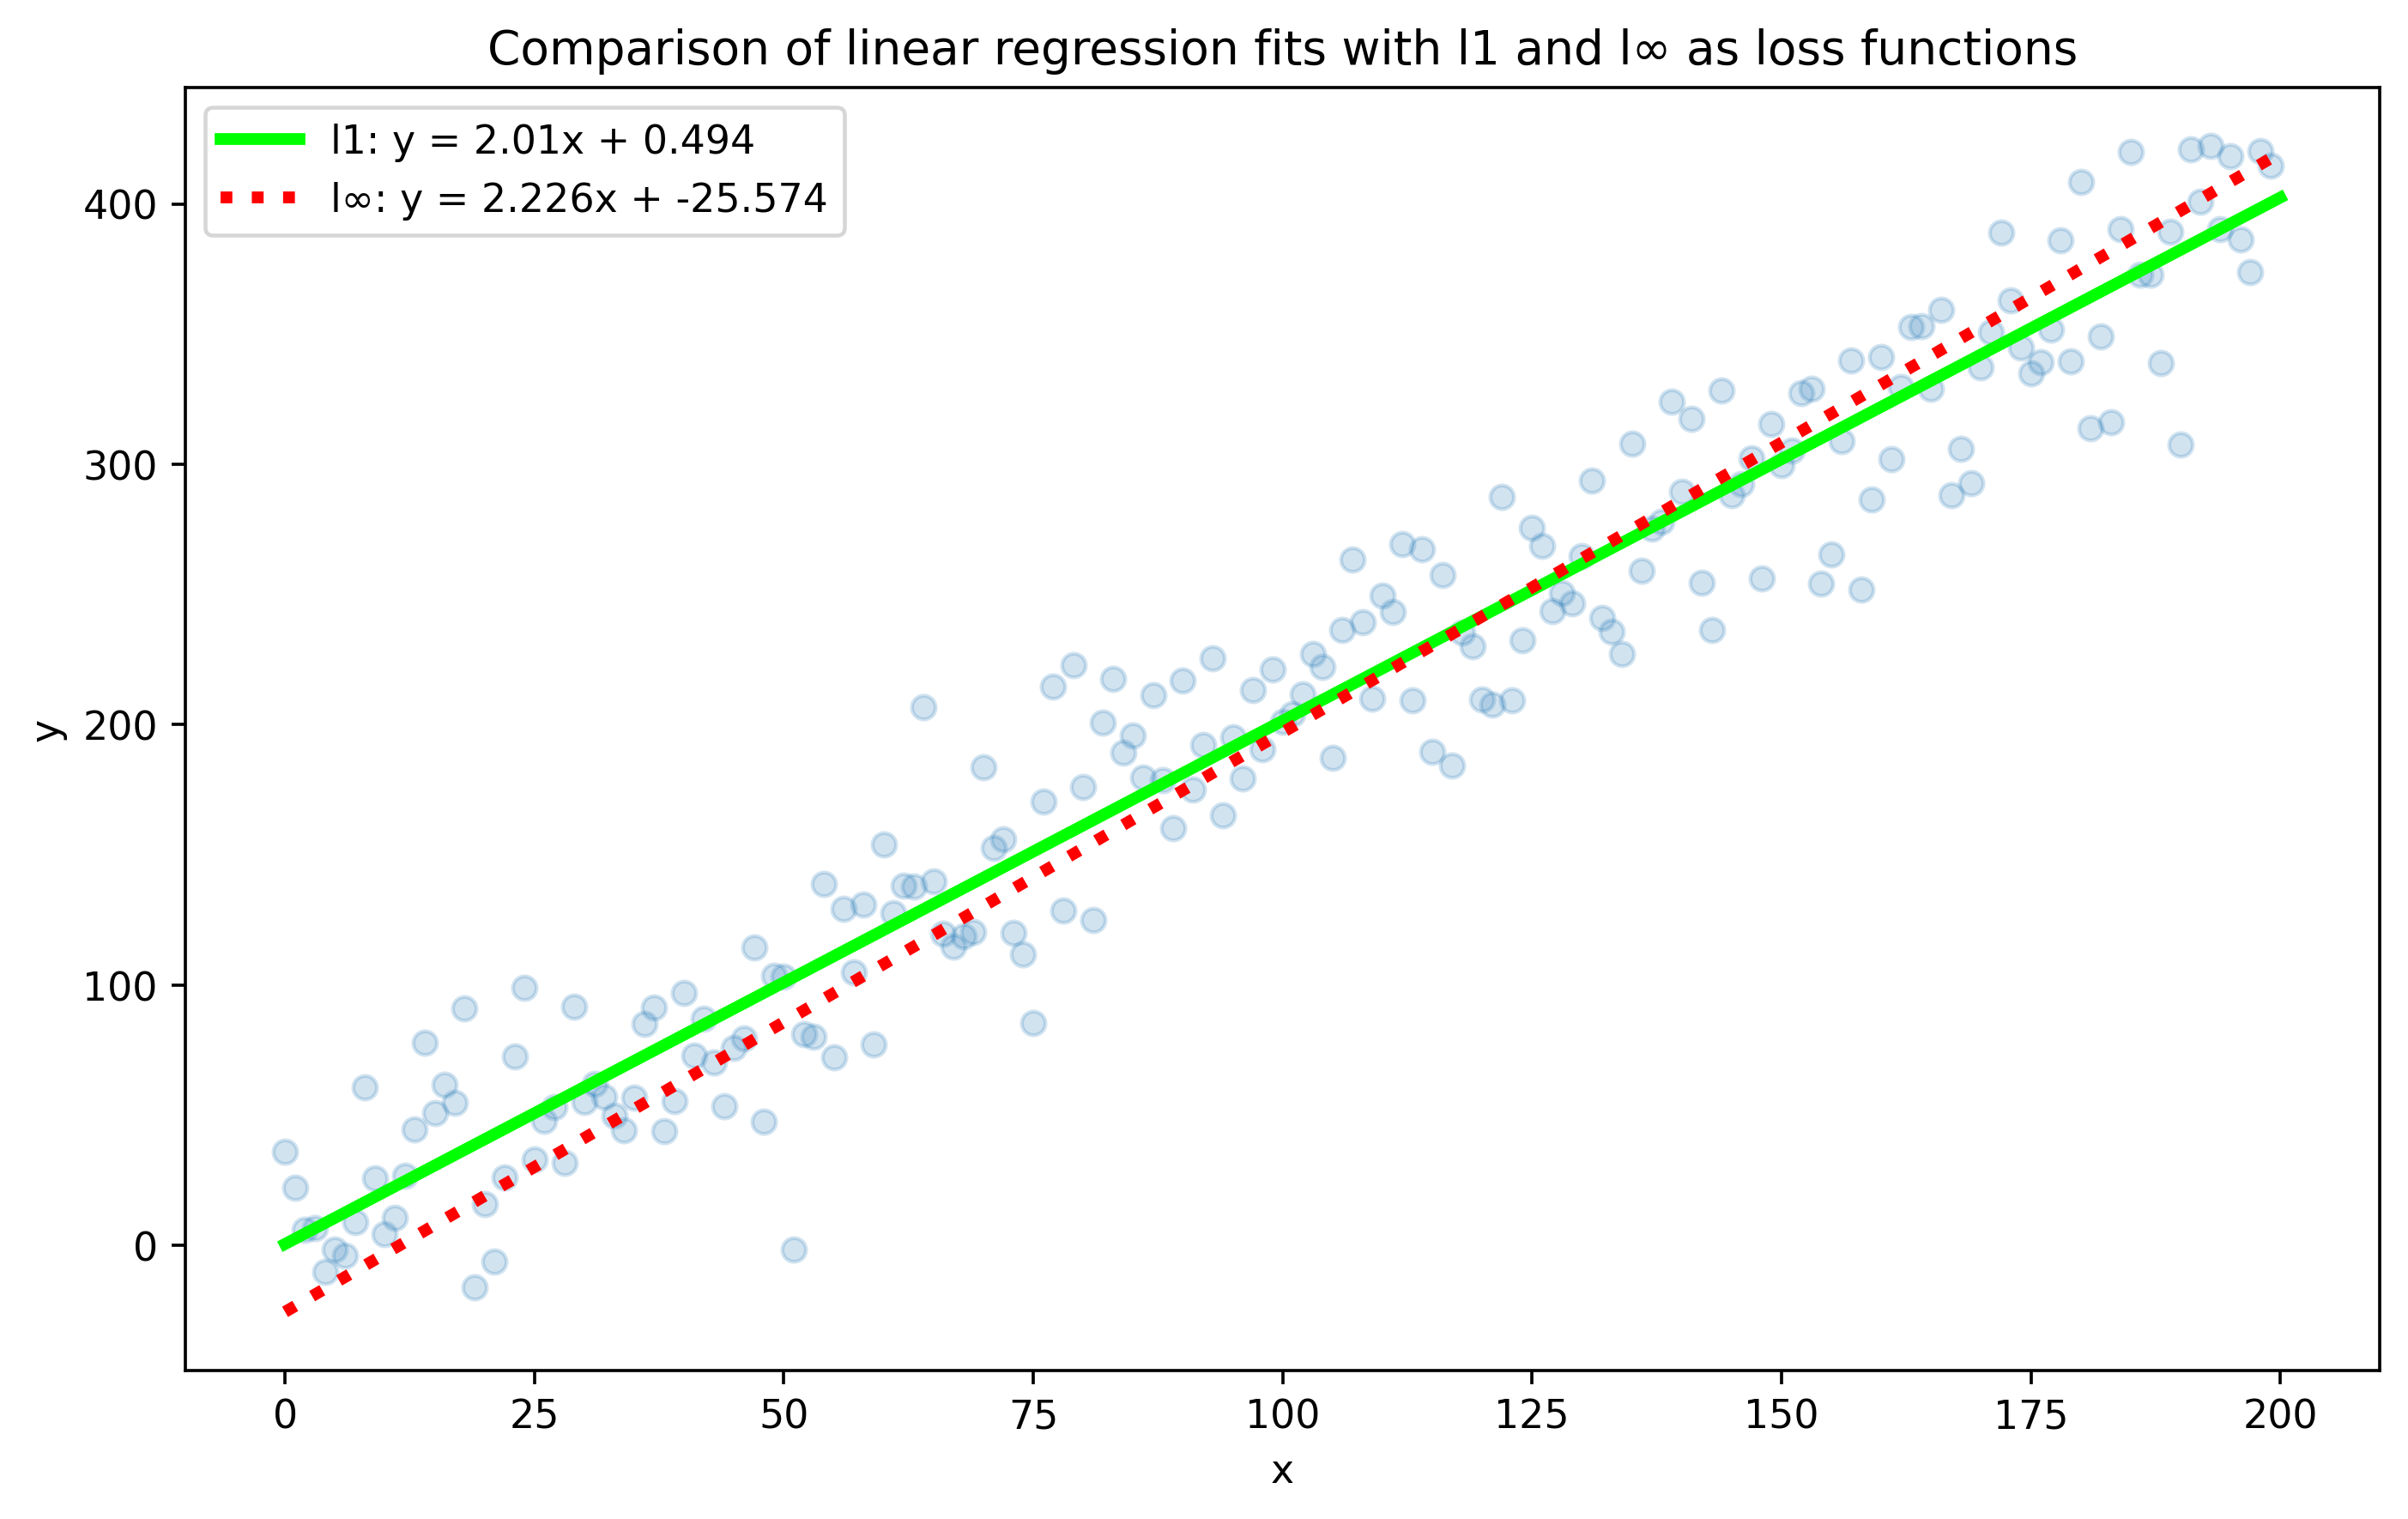

In [160]:
x_pt_l1 = np.linspace(0, 200, 2)
y_pt_l1 = theta_l1[0]*x_pt_l1 + theta_l1[1]
x_pt_linf = np.linspace(0, 200, 2)
y_pt_linf = theta_linf[0]*x_pt_linf + theta_linf[1]

plt.figure(figsize=(10, 6), dpi=330)
plt.scatter(data[:, 0], targets, alpha=0.2)
plt.plot(x_pt_l1, y_pt_l1, color="lime", linewidth=3, linestyle="-", label=f"l1: y = {round(theta_l1[0], 3)}x + {round(theta_l1[1], 3)}")
plt.plot(x_pt_linf, y_pt_linf, color="red", linewidth=3, linestyle=":", label=f"l∞: y = {round(theta_linf[0], 3)}x + {round(theta_linf[1], 3)}")

plt.title("Comparison of linear regression fits with l1 and l∞ as loss functions")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()